Analyzing census bureau data

In [1]:
#importing the neccesssary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [12]:
#importing the training and testing data from the below mentioned links
train_set = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', header = None)
test_set = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test',
                      skiprows = 1, header = None) # skip a row for the test set

In [13]:
#creating the list for storing the column names
col_labels = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 
              'relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
             'wage_class']

In [14]:
#assigning the column names to the train and test dataframe
train_set.columns = col_labels
test_set.columns = col_labels

In [15]:
#checking the info such as datatype for the given columns in the training dataframe
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
workclass         32561 non-null object
fnlwgt            32561 non-null int64
education         32561 non-null object
education_num     32561 non-null int64
marital_status    32561 non-null object
occupation        32561 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital_gain      32561 non-null int64
capital_loss      32561 non-null int64
hours_per_week    32561 non-null int64
native_country    32561 non-null object
wage_class        32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [16]:
#checking the info such as datatype for the given columns in the test dataframe
test_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16281 entries, 0 to 16280
Data columns (total 15 columns):
age               16281 non-null int64
workclass         16281 non-null object
fnlwgt            16281 non-null int64
education         16281 non-null object
education_num     16281 non-null int64
marital_status    16281 non-null object
occupation        16281 non-null object
relationship      16281 non-null object
race              16281 non-null object
sex               16281 non-null object
capital_gain      16281 non-null int64
capital_loss      16281 non-null int64
hours_per_week    16281 non-null int64
native_country    16281 non-null object
wage_class        16281 non-null object
dtypes: int64(6), object(9)
memory usage: 1.9+ MB


In [17]:
#replacing the ? in train/test set with nan and later droping those rows
#storing the new information in the new dataframes
train_nomissing = train_set.replace(' ?', np.nan).dropna()
test_nomissing = test_set.replace(' ?', np.nan).dropna()

In [18]:
#replacing the irregularities in the wage columns of testing set
test_nomissing['wage_class'] = test_nomissing.wage_class.replace({' <=50K.': ' <=50K', ' >50K.':' >50K'})

In [19]:
#checking the unique values of 'wage_class' column in the training data
train_nomissing['wage_class'].unique()

array([' <=50K', ' >50K'], dtype=object)

In [20]:
#checking the unique values of 'wage_class' column in the testing data
test_nomissing['wage_class'].unique()

array([' <=50K', ' >50K'], dtype=object)

In [21]:
#combining the datasets
df = pd.concat([train_nomissing, test_nomissing], axis = 0) # Stacks them vertically

In [22]:
#check the combined dataframe header
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [23]:
#check the shape of the combined dataframe
df.shape

(45222, 15)

In [24]:
#view summary of combined dataframe
df.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,45222.000000,4.522200e+04,45222.000000,45222.000000,45222.000000,45222.000000
mean,38.547941,1.897347e+05,10.118460,1101.430344,88.595418,40.938017
std,13.217870,1.056392e+05,2.552881,7506.430084,404.956092,12.007508
min,17.000000,1.349200e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.173882e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783160e+05,10.000000,0.000000,0.000000,40.000000
75%,47.000000,2.379260e+05,13.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [25]:
#calculate percentage of different-2 classes in the combined dataframe
from collections import Counter

dict = Counter(df['wage_class'])
print(f"dictionary with all classes : {dict}")
print(f"Keys for the different-2 classes : {dict.keys()}")
print(f"dict[' >50K'] : {dict[' >50K']} , dict[' <=50K'] : {dict[' <=50K']}")
print(f"Class 1 percentage : {dict[' >50K']/len(df)*100} , Class 2 percentage : {dict[' <=50K']/len(df)*100}")

dictionary with all classes : Counter({' <=50K': 34014, ' >50K': 11208})
Keys for the different-2 classes : dict_keys([' <=50K', ' >50K'])
dict[' >50K'] : 11208 , dict[' <=50K'] : 34014
Class 1 percentage : 24.78439697492371 , Class 2 percentage : 75.21560302507629


In [26]:
#setting the style of the plots
plt.style.use('fivethirtyeight')
sns.set_style('white')

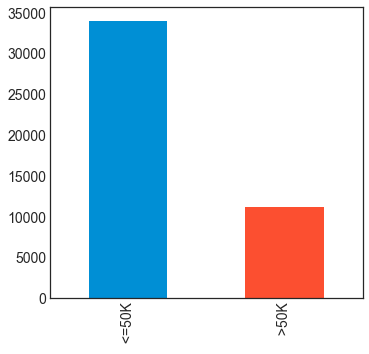

In [27]:
#visualize column salary of the dataframe
df['wage_class'].value_counts().plot(kind='bar',figsize=(5,5))

In [28]:
df['wage_class'] = df['wage_class'].map({' >50K': 1, ' <=50K': 0})

Preprocessing (Handling Missing/Duplicate/Categorical data)

In [29]:
#print information about missing data
print(f"Check count of the missing data in dataframe : {df.isna().any().count()}")

#handle missing data in the newly created dataframe if there is any
if df.isna().any().count() :
    df.fillna(value=-99999,axis=1,inplace=True)
    #print(f"\nheader of the new dataframe after handling of the missing data : \n{df1.head}")
    print("Info : Missing entries are updated in the dataframe")


#handle categorical data
df1 = pd.get_dummies(df)

#print information such as shape, duplicate entries in newly created dataframe
print(f"\nshape of the new dataframe before preprocessing : {df1.shape}")
print(f"Check count of the duplicated data in newly create dataframe : {df1.duplicated().sum()}")

#remove duplicates if there is any
if df1.duplicated().any().sum() :
    df1.drop_duplicates(inplace=True)
    print(f"\nshape of the new dataframe after removal of duplicate entries : {df1.shape}")

Check count of the missing data in dataframe : 15
Info : Missing entries are updated in the dataframe

shape of the new dataframe before preprocessing : (45222, 105)
Check count of the duplicated data in newly create dataframe : 47

shape of the new dataframe after removal of duplicate entries : (45175, 105)


In [30]:
#split dataframe into df_x and df_y
df_x = df1.drop(['wage_class'], axis=1)
df_y = df1['wage_class']

In [31]:
from sklearn.ensemble import RandomForestClassifier

#use RandomForestClassifier to check feature_importances
rfc = RandomForestClassifier(random_state=10)
rfc.fit(df_x, df_y)

feature_importances = pd.DataFrame({'feature':df_x.columns,'importance':np.round(rfc.feature_importances_,4)})
feature_importances = feature_importances.sort_values('importance',ascending=False).set_index('feature')

Text(0.5,0,'Importance')

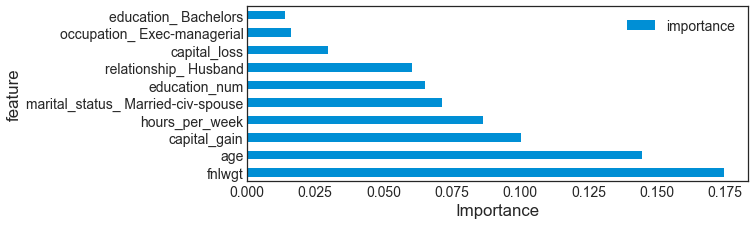

In [37]:
#visualize top 10 features of the dataframe
feature_importances[:10].plot(kind='barh',figsize=(8,3))
plt.xlabel('Importance')

Apply model on training and test dataset

In [38]:
#splitting the data into training and testing set
from sklearn.model_selection import train_test_split

# split dataset into train(75%),test(10%),cross-validation(15%)
x, x_test, y, y_test = train_test_split(df_x,df_y,test_size=1/3,train_size=2/3, random_state = 0)
x_train, x_cv, y_train, y_cv = train_test_split(x,y,test_size = 0.40,train_size =0.60, random_state = 0)

In [39]:
#apply logistic regression model on the dataset
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

lr1 = LogisticRegression()
lr = RFE(lr1, 50)
lr.fit(x_train,y_train)

RFE(estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
  n_features_to_select=50, step=1, verbose=0)

In [40]:
#apply decision tree classifier model on the dataset
from sklearn.tree import DecisionTreeClassifier

d_tree = DecisionTreeClassifier(min_samples_split=10, random_state=55, max_features=50)
d_tree.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=50, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=10,
            min_weight_fraction_leaf=0.0, presort=False, random_state=55,
            splitter='best')

In [41]:
#apply Bagging classifier on the dataset
from sklearn.ensemble import BaggingClassifier

Boosting = BaggingClassifier(n_estimators=200)
Boosting.fit(x_train,y_train)

BaggingClassifier(base_estimator=None, bootstrap=True,
         bootstrap_features=False, max_features=1.0, max_samples=1.0,
         n_estimators=200, n_jobs=1, oob_score=False, random_state=None,
         verbose=0, warm_start=False)

In [42]:
#apply Random forest classifier on the dataset
rfc = RandomForestClassifier(random_state=55,max_features=50)
rfc.fit(df_x,df_y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=50, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=55, verbose=0, warm_start=False)

Analyse model performances using roc_auc_score and accuracy score

In [52]:
from sklearn.metrics import r2_score, roc_auc_score, accuracy_score, confusion_matrix, roc_curve, auc, classification_report

In [53]:
models = pd.DataFrame(index=['train_ras','cv_ras','test_ras','accuracy_score'], 
                      columns=['logistic_regression','decision_tree','random_forest','xgboost'])

In [54]:
models.loc['train_ras','logistic_regression'] = roc_auc_score(y_true=y_train, y_score=lr.predict(x_train))
models.loc['cv_ras','logistic_regression'] = roc_auc_score(y_true=y_cv, y_score=lr.predict(x_cv))
models.loc['test_ras','logistic_regression'] = roc_auc_score(y_true=y_test, y_score=lr.predict(x_test))
models.loc['accuracy_score','logistic_regression'] = accuracy_score(y_pred=lr.predict(x_test).round(), y_true=y_test)

models.loc['train_ras','decision_tree'] = roc_auc_score(y_score=d_tree.predict(x_train), y_true=y_train)
models.loc['cv_ras','decision_tree'] = roc_auc_score(y_score=d_tree.predict(x_cv), y_true=y_cv)
models.loc['test_ras','decision_tree'] = roc_auc_score(y_score=d_tree.predict(x_test), y_true=y_test)
models.loc['accuracy_score','decision_tree'] = accuracy_score(y_pred=d_tree.predict(x_test).round(), y_true=y_test)

models.loc['train_ras','random_forest'] = roc_auc_score(y_score=rfc.predict(x_train), y_true=y_train)
models.loc['cv_ras','random_forest'] = roc_auc_score(y_score=rfc.predict(x_cv), y_true=y_cv)
models.loc['test_ras','random_forest'] = roc_auc_score(y_score=rfc.predict(x_test), y_true=y_test)
models.loc['accuracy_score','random_forest'] = accuracy_score(y_pred=rfc.predict(x_test).round(), y_true=y_test)

models.loc['train_ras','xgboost'] = roc_auc_score(y_score=Boosting.predict(x_train), y_true=y_train)
models.loc['cv_ras','xgboost'] = roc_auc_score(y_score=Boosting.predict(x_cv), y_true=y_cv)
models.loc['test_ras','xgboost'] = roc_auc_score(y_score=Boosting.predict(x_test), y_true=y_test)
models.loc['accuracy_score','xgboost'] = accuracy_score(y_pred=Boosting.predict(x_test).round(), y_true=y_test)

In [55]:
models

,logistic_regression,decision_tree,random_forest,xgboost
train_ras,0.725992,0.898886,0.979395,0.999886
cv_ras,0.723882,0.751782,0.97683,0.776404
test_ras,0.727827,0.748978,0.97611,0.77418
accuracy_score,0.816987,0.823693,0.987051,0.847799


It is clear by analyzing the roc_auc_score and accuracy_score that random forest is the best model to do the prediction using the census bureau database. So we will use random forest to proceed further for checking model performance on this dataset.

In [56]:
confusion_matrix(y_pred=rfc.predict(x_test), y_true=y_test)

array([[11276,    23],
       [  172,  3588]], dtype=int64)

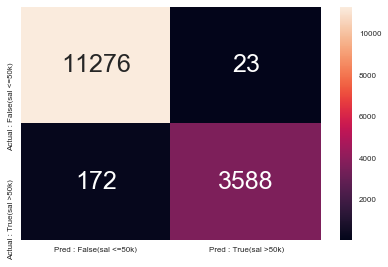

In [57]:
arr=confusion_matrix(y_pred=rfc.predict(x_test), y_true=y_test)

df_cm = pd.DataFrame(arr, range(2), range(2))
#plt.figure(figsize = (4,3))
sns.set(font_scale=0.8)#for label size
sns.heatmap(df_cm, 
           annot=True,
           annot_kws={"size": 25},
           fmt='.5g',
           xticklabels=['Pred : False(sal <=50k)','Pred : True(sal >50k)'], 
           yticklabels=['Actual : False(sal <=50k)','Actual : True(sal >50k)'])

Sometimes it is not sufficient to conclude a model performance only using the accuracy score as that can be good due to class imbalance also. So we need to analyse Recall,Precision,F1-score which will give a clear statistics on all the available classes in the dataset.

In [62]:
print(confusion_matrix(y_pred=rfc.predict(x_test), y_true=y_test))
print('\n')
print(classification_report(y_pred=rfc.predict(x_test), y_true=y_test))

[[11276    23]
 [  172  3588]]


             precision    recall  f1-score   support

          0       0.98      1.00      0.99     11299
          1       0.99      0.95      0.97      3760

avg / total       0.99      0.99      0.99     15059



ROC AUC: 0.00


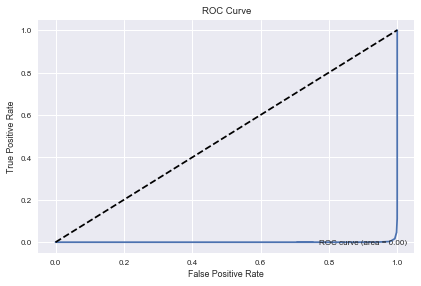

ROC AUC: 1.00


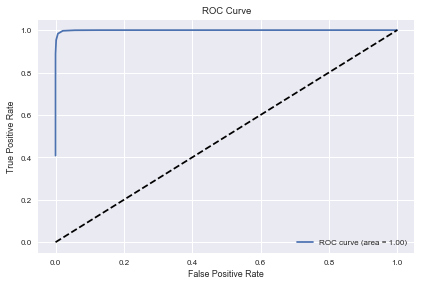

In [63]:
#plot ROC Curve and caluclate AUC

for i in range(2): # as there are two classes in our dataset for prediciton
    
    # Determine the false negative and true negative rates (when i = 0)
    # Determine the false positive and true positive rates (when i = 1)
    fpr, tpr, _ = roc_curve(y_test, rfc.predict_proba(x_test)[:,i])

    # Calculate the AUC (area under curve)
    roc_auc = auc(fpr, tpr)
    print('ROC AUC: %0.2f' % roc_auc)

    # Plot of a ROC curve for a specific class
    plt.figure()
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    #plt.xlim([0.0, 1.0])
    #plt.ylim([0.0, 1.05])
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.show()

Conclusion from ROC Curve : IN curve-1 (used for class 0 : salary <=50k) : AUC - 0 and prediction for this class is happening perfectly. IN curve-1 (used for class 1 : salary >50k) : AUC - 1 and prediction for this class is happening perfectly.

So random forest is the best model which is providing best accuracy, precision, recall, F1-score.